# 1.관련 패키지 설치하기

In [5]:
!pip install kiwipiepy
!pip install pandas
!pip install seaborn
!pip install matplotlib
!pip install wordcloud
!pip install Pillow --upgrade
!pip install numpy
!pip install xlrd
!pip install openpyxl
!pip install pandas
!pip install nltk

# 2.단어 온톨로지 사전 불러오기

In [7]:
import pandas as pd
df_dic = pd.read_excel('./data/ontology/ontology.xlsx')
# C:\Users\채가은\Downloads\BDA2023\BDA2023\data\ontology
print(df_dic[:100])

    단어 클래스
0   강의  강의
1   수업  강의
2   내용  강의
3   교양  강의
4   재밌  강의
..  ..  ..
95  과제  과제
96  대체  과제
97  발표  과제
98  팀플  과제
99  제출  과제

[100 rows x 2 columns]


In [8]:
from kiwipiepy import Kiwi

kiwi = Kiwi()
wordList = df_dic.loc[:,["단어"]]
wordType = set()

wordsPOS = []
for i in range(0,len(wordList)):
    classWords = str(df_dic.loc[i,"클래스"])
    wordType.add(str(classWords))
    target = wordList.iloc[i,0]
    posTagout = kiwi.tokenize(target)
    # print(posTagout)
    wordPOS = ""
    for eachOut in posTagout:
        result = eachOut[0]+"/"+eachOut[1]
        wordPOS = result
        break
    wordPOS = wordPOS.strip()
    wordsPOS.append(wordPOS)
print(wordsPOS[:10])
print(wordType)

['강의/NNG', '수업/NNG', '내용/NNG', '교양/NNG', '재밌/VA', '과목/NNG', '학기/NNG', '추천/NNG', '사람/NNG', '배우/NNG']
{'과제', '시험', '강의', '성적', '교수'}


In [9]:
df_dic['품사태깅'] = wordsPOS
classWords = list(wordType)
print(df_dic[:100])
print(classWords)

    단어 클래스    품사태깅
0   강의  강의  강의/NNG
1   수업  강의  수업/NNG
2   내용  강의  내용/NNG
3   교양  강의  교양/NNG
4   재밌  강의   재밌/VA
..  ..  ..     ...
95  과제  과제  과제/NNG
96  대체  과제  대체/MAG
97  발표  과제  발표/NNG
98  팀플  과제  팀플/NNG
99  제출  과제  제출/NNG

[100 rows x 3 columns]
['과제', '시험', '강의', '성적', '교수']


In [10]:
#감정들이 가지고 있는 단어 목록 확인하기
ontologyDic = {}
for eachClass in classWords:
    ontologyDic[eachClass] = list(df_dic[df_dic.클래스==eachClass]['품사태깅'])
    print(eachClass)
    print(list(df_dic[df_dic.클래스==eachClass]['품사태깅']))
print(ontologyDic)

과제
['과제/NNG', '대체/MAG', '발표/NNG', '팀플/NNG', '제출/NNG', '토론/NNG', '조/NNP', '보고서/NNG', '매주/MAG', '개인/NNG', '팀/NNG', '레포트/NNG', '주제/NNG', '프로젝트/NNG', '에세이/NNG', '감상문/NNG', '페이지/NNG', '팀원/NNG', '조별/NNG', '모임/NNG', '비평/NNG', '조원/NNG', '기획/NNG', '계획서/NNG', '서평/NNG', '활동/NNG']
시험
['시험/NNG', '나오/VV', '기말/NNG', '중간/NNG', '문제/NNG', '공부/NNG', '외우/VV', '소스/NNG', '퀴즈/NNG', '북/NNG', '오픈/NNG', '범위/NNG', '서술/NNG', '만점/NNG', '암기/NNG', '준비/NNG', '중간고사/NNG', '기말고사/NNG', '맞/VV', '푸/NNP', '지필/NNG', '지엽/NNG', '객관식/NNG', '출제/NNG', '시험공부/NNG', '맞추/VV', '달달/MAG', '틀리/VA', '채점/NNG']
강의
['강의/NNG', '수업/NNG', '내용/NNG', '교양/NNG', '재밌/VA', '과목/NNG', '학기/NNG', '추천/NNG', '사람/NNG', '배우/NNG', '모르/VV', '관심/NNG', '이해/NNG', '꿀/NNG', '본인/NNG', '수강/NNG', '흥미/NNG', '자신/NNG', '재미있/VA', '역사/NNG', '철학/NNG', '괜찮/VA', '지식/NNG', '신청/NNG', '좋아하/VV', '만족/NNG', '도움/NNG', '전공/NNG', '대학/NNG', '최고/NNG', '문학/NNG', '계절/NNG', '인생/NNG', '아쉽/VA-I', '관점/NNG', '걱정/NNG', '단점/NNG', '빡세/VA', '학교/NNG', '피하/NNG', '졸업/NNG', '인정/NNG', '아주대/NNP', '수학/NN

In [11]:
#단어-감정 사전 만들기
wordOntologyDic = {}
for i in range(0,len(df_dic)):
    wordOntologyDic[df_dic.loc[i,"품사태깅"]] = df_dic.loc[i,"클래스"]
print(wordOntologyDic)

{'강의/NNG': '강의', '수업/NNG': '강의', '내용/NNG': '강의', '교양/NNG': '강의', '재밌/VA': '강의', '과목/NNG': '강의', '학기/NNG': '강의', '추천/NNG': '강의', '사람/NNG': '강의', '배우/NNG': '강의', '모르/VV': '강의', '관심/NNG': '강의', '이해/NNG': '강의', '꿀/NNG': '강의', '본인/NNG': '강의', '수강/NNG': '강의', '흥미/NNG': '강의', '자신/NNG': '강의', '재미있/VA': '강의', '역사/NNG': '강의', '철학/NNG': '강의', '괜찮/VA': '강의', '지식/NNG': '강의', '신청/NNG': '강의', '좋아하/VV': '강의', '만족/NNG': '강의', '도움/NNG': '강의', '전공/NNG': '강의', '대학/NNG': '강의', '최고/NNG': '강의', '문학/NNG': '강의', '계절/NNG': '강의', '인생/NNG': '강의', '아쉽/VA-I': '강의', '관점/NNG': '강의', '걱정/NNG': '강의', '단점/NNG': '강의', '빡세/VA': '강의', '학교/NNG': '강의', '피하/NNG': '강의', '졸업/NNG': '강의', '인정/NNG': '강의', '아주대/NNP': '강의', '수학/NNG': '강의', '이과/NNG': '강의', '온라인/NNG': '강의', '아깝/VA-I': '강의', '싫/VA': '강의', '미술/NNG': '강의', '기회/NNG': '강의', '필수/NNG': '강의', '추가/NNG': '강의', '지각/NNG': '강의', '줌/MAG': '강의', '정치/NNG': '강의', '장점/NNG': '강의', '언어/NNG': '강의', '새롭/VA-I': '강의', '문과/NNG': '강의', '따라가/VV': '교수', '고전/NNG': '강의', '고등학교/NNG': '강의', '학습/NNG'

# 3. 말뭉치 데이터 불러오기

In [47]:
# 데이터 불러오기
import re

fileDir = "./data/corpus.txt"
fr = open(fileDir, 'rt', encoding='UTF8')
contents = fr.readlines()
fr.close()

reviewList = []
for content in contents:
    content = re.sub('[^가-힣]', ' ', content).replace("\n","")
    content = re.sub('[\s]+', ' ', content).strip()
    if content == "" or content == " ":
        pass
    else:
        reviewList.append(content)

for eachReview in reviewList:
    print(eachReview)

학점이 짜다 수업 재미없음 교시여서 사람이 많이 안오지만 결석 번 할 수 있어서 메리트가 없다
년 학기 수강자
추천 신고
출결이 매우 중요합니다 시험은 대부분 서술형으로 기재됩니다
출결이 깐깐하지 않은 점 팀플 없는 점 과제 없는 점 장점으로는 이렇게 세 가지가 있고요 나머지는 다 단점이라고 생각하시는 게 좋을 겁니다 강의 내용은 머릿속에 잘 안 들어오고 튕겨져 나가는 느낌인데 시험은 어렵게 나와요 아 장점 하나 더 있네요 수업 열심히 안 듣고 평소에 공부도 잘 안 해두는 학생들이 많아서 예상했던 성적 뜨고 그랬습니다
출석과 시험만 중요시 여기면 됩니다 과제는 하나도 없습니다 시험은 지엽적인 것도 많이 나오니 피피티에 있는 참고자료도 꼼꼼하게 살피시는 것이 좋습니다
시험 기출이랑 다르게 나오고 교수님 말씀에서 시험이 많이 나온다
교시 수업이라서 눈 뜨고 있기가 힘들었음 수업내용 자체는 재밌음 교수님 말씀 다 타이핑 해서 공부해야 시험 점수 잘 받을 수 있음
과제 하나도 없고 오로지 출석 시험임 수업 때 교수님 말씀 안들으면 점수 안나온다고 보면 됨 수업만 들으면 되는 과목이라 개꿀일 수 있지만 교시라 수업 듣는 것 자체가 힘듦
과제팀플없어서 선택한 과목 교수님이 수업 때 정말 많은 것을 얘기하시는데 필기 잘해야 함
과제는 전혀 하나도 없음 근데 코로나 때 수강한 동기 얘기들 들어보니까 이전에는 수업시간 끝날 때마다 요약해서 제출했다고 하는데 이번에 부턴 사라진듯 글고 비콘말고 인증번호로 출석하시고 사람 인원수 안맞으면 직접 호명하심 출튀나 인증번호 받아서 출석할 생각은 안하는게
과제 조모임 싫어하는 분들에겐 강추 드립니다 중간 기말 시험 두 번으로 성적이 나옵니다 교수님께서 올려주신 강의노트에 평소 수업 시간 필기 열심히 해서 그것만 공부하면 어느 정도 성적이 나옵니다 이과라 한국사 말고 역사 쪽 안 한지 오래됐는데 공부 좀 해서 챙겨갑니다 수업 내용도 흥미롭게 잘 해주셔서 만족했던 강의인 것 같습니다
과제 팀플 없고 중간 기말 시험이 끝입니다 과제 싫어하시는

In [19]:
from kiwipiepy import Kiwi
import re

kiwi = Kiwi()
#품사태깅된 문장
reviewPOSList = []
#단어의 타입 확인
wordType = set()
sentencePOSAll = []
sentencePOSContent = []
sentencePOSTextAll = ""


for eachReview in reviewList:
    #띄어쓰기
    eachReviewSpace = kiwi.space(eachReview)
    #문장 분할
    eachReviewSpaceSentences = kiwi.split_into_sents(eachReviewSpace)
    for sentence in eachReviewSpaceSentences:
        content = sentence.text
        #품사태깅
        posTagout = kiwi.tokenize(content)
        sentencePOS = ''
        for eachOut in posTagout:
            if "VV" in eachOut[1] or "VA" in eachOut[1] or "NN" in eachOut[1] or "MA" in eachOut[1]:
                resultContent = eachOut[0] + "/" + eachOut[1]
                sentencePOSContent.append(resultContent)
                
                result = eachOut[0] + "/" + eachOut[1]
            sentencePOS = sentencePOS + " " + result
            sentencePOSAll.append(result)
            if result != "":
                wordType.add(result)
            sentencePOSTextAll = sentencePOSTextAll + " " + eachOut[0]
        sentencePOS = sentencePOS.strip()
#         sentencePOSAll = sentencePOSAll + " " + sentencePOS
        reviewPOSList.append(sentencePOS)

sentencePOSTextAll = sentencePOSTextAll.strip()

print(sentencePOSContent[:20])
print(sentencePOSAll[:20])
print(wordType)
print(len(wordType))
print(reviewPOSList[:10])
print(len(reviewPOSList))

['학점/NNG', '짜/VA', '수업/NNG', '재미없/VA', '교시/NNB', '이/VV', '사람/NNG', '많이/MAG', '안/MAG', '오/VV', '결석/NNG', '번/NNB', '하/VV', '수/NNB', '있/VA', '메리트/NNP', '없/VA', '년/NNB', '학기/NNG', '수강자/NNG']
['학점/NNG', '학점/NNG', '짜/VA', '짜/VA', '수업/NNG', '재미없/VA', '재미없/VA', '교시/NNB', '이/VV', '이/VV', '사람/NNG', '사람/NNG', '많이/MAG', '안/MAG', '오/VV', '오/VV', '결석/NNG', '번/NNB', '하/VV', '하/VV']
{'나락/NNG', '쉬/VV', '최대한/NNG', '불어나/VV', '북벌/NNG', '끊어지/VV', '이때/NNG', '비프/NNG', '멘붕/NNG', '넒/NNG', '바짝/MAG', '물음/NNG', '과락/NNG', '논점/NNG', '혐오감/NNG', '미루/VV', '응답/NNG', '여로모/NNG', '인류/NNG', '마침/MAG', '반증/NNG', '따/NNG', '문자/NNG', '더/MAG', '시/VA', '캐리/NNP', '끝장/NNG', '귀엽/VA-I', '우우우/MAG', '암기력/NNG', '진희/NNP', '이공/NNG', '천문학자/NNG', '각/NNG', '바다/NNG', '갈/VV', '시선/NNG', '바탕/NNG', '챙기/VV', '참여/NNG', '성찰/NNG', '생명/NNG', '그래프/NNG', '지/VV', '매사/NNG', '햇갈려요/NNG', '몸/NNG', '셤/NNG', '아니얐/NNG', '서로/MAG', '뒤늦/VA', '기창경/NNG', '쪽지셤/NNG', '땅/NNG', '안일/NNG', '남성/NNG', '가득/MAG', '기술/NNG', '출첵/NNG', '이의/NNG', '출신/NNG', '통합/NNG', '전산/NNG', '편/

# 4. 말뭉치 사용 빈도 기반 시각화 하기

## 4-1 전체 데이터 사용하기

<Axes: xlabel='n', ylabel='word'>

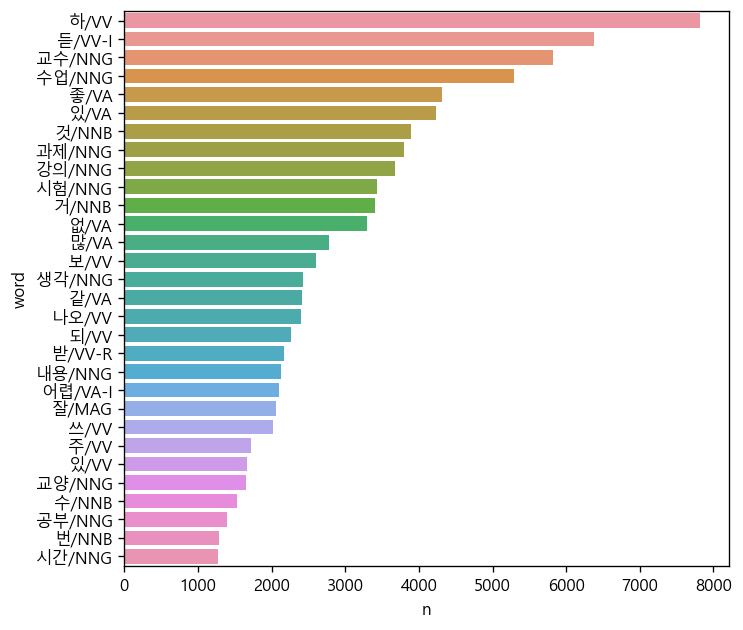

In [21]:
import pandas as pd
df_words = pd.DataFrame({'word':sentencePOSAll})

# 단어의 글자수 변수 추가하기
df_words['count'] = df_words['word'].str.len()

#글자수가 2이상인 단어들만 남기기
df_words = df_words.query('count >= 2')

#단어들의 등장 빈도수 확인하기
#단어 별로 분리하기
df_words = df_words.groupby('word', as_index = False)
#빈도 계산하기
df_words = df_words.agg(n=('word', 'count'))
#내림차수으로 정렬하기
df_words = df_words.sort_values('n', ascending = False)

top30 = df_words.head(30)

import seaborn as sns
import matplotlib.pyplot as plt

#plt.rcParams.update({'font.family':'NanumBarunGothic'})
plt.rcParams.update({'font.family':'Malgun Gothic'})
plt.rcParams.update({'figure.dpi':'120'})
plt.rcParams.update({'figure.figsize':[6.5,6]})

sns.barplot(data = top30, y = 'word', x = 'n')


In [22]:
#현재의 데이터 딕셔너리로 변환하기
df_words_dic = df_words.set_index('word').to_dict()['n']

from wordcloud import WordCloud
from PIL import Image # 만약 "No module named 'PIL'" 에러가 발생하면 [ pip install Pillow==5.4.1 ] 로 라이브러리를 설치
import numpy as np
import matplotlib.pyplot as plt

#font = '/Users/seongminmun/opt/anaconda3/pkgs/notebook-6.4.5-py39hecd8cb5_0/lib/python3.9/site-packages/notebook/static/components/MathJax/fonts/DoHyeon-Regular.ttf'
font = './data/DoHyeon-Regular.ttf'
word_cloud = WordCloud(font_path = font,
                       width = 2000, height = 1000,
                       background_color='white')

word_cloud.generate_from_frequencies(df_words_dic)

plt.figure(figsize=(15,15))
plt.imshow(word_cloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

## 4-2 문맥 단어만 사용하기

<Axes: xlabel='n', ylabel='word'>

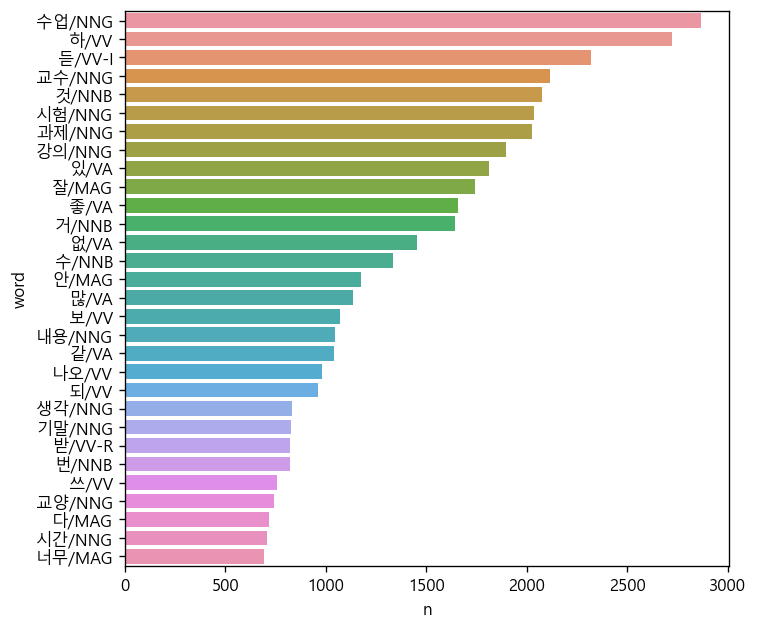

In [24]:
import pandas as pd
df_words = pd.DataFrame({'word':sentencePOSContent})

# 단어의 글자수 변수 추가하기
df_words['count'] = df_words['word'].str.len()

#글자수가 2이상인 단어들만 남기기
df_words = df_words.query('count >= 2')

#단어들의 등장 빈도수 확인하기
#단어 별로 분리하기
df_words = df_words.groupby('word', as_index = False)
#빈도 계산하기
df_words = df_words.agg(n=('word', 'count'))
#내림차수으로 정렬하기
df_words = df_words.sort_values('n', ascending = False)

top30 = df_words.head(30)

import seaborn as sns
import matplotlib.pyplot as plt

# plt.rcParams.update({'font.family':'NanumBarunGothic'})
plt.rcParams.update({'font.family':'Malgun Gothic'})
plt.rcParams.update({'figure.dpi':'120'})
plt.rcParams.update({'figure.figsize':[6.5,6]})

sns.barplot(data = top30, y = 'word', x = 'n')

In [25]:
#현재의 데이터 딕셔너리로 변환하기
df_words_dic = df_words.set_index('word').to_dict()['n']

from wordcloud import WordCloud
from PIL import Image # 만약 "No module named 'PIL'" 에러가 발생하면 [ pip install Pillow==5.4.1 ] 로 라이브러리를 설치
import numpy as np
import matplotlib.pyplot as plt

#font = '/Users/seongminmun/opt/anaconda3/pkgs/notebook-6.4.5-py39hecd8cb5_0/lib/python3.9/site-packages/notebook/static/components/MathJax/fonts/DoHyeon-Regular.ttf'
font = './data/DoHyeon-Regular.ttf'
word_cloud = WordCloud(font_path = font,
                       width = 2000, height = 1000,
                       background_color='white')

word_cloud.generate_from_frequencies(df_words_dic)

plt.figure(figsize=(15,15))
plt.imshow(word_cloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

## 4-3 문맥 안에서 단어 사용 확인하기

In [26]:
from nltk import *
retokenize = RegexpTokenizer("[\w]+")
text = Text(retokenize.tokenize(sentencePOSTextAll))
text.concordance("강의")

Displaying 25 of 1897 matches:
 는 다 단점 이 라고 생각 하 시 는 것 이 좋 을 거 이 ᆸ니다 강의 내용 은 머릿속 에 잘 안 들어오 고 튕기 어 지 어 나가 는 느낌
두 번 으로 성적 이 나오 ᆸ니다 교수 님 께서 올리 어 주 시 ᆫ 강의 노트 에 평소 수업 시간 필기 열심히 하 어서 그것 만 공부 하 면
 수업 내용 도 흥미 롭 게 잘 하 어 주 시 어서 만족 하 었 던 강의 이 ᆫ 것 같 습니다 과제 팀플 없 고 중간 기말 시험 이 끝 이 
답 형 점수 를 커버 하 어 주 지 않 었 나 생각 하 ᆸ니다 그냥 강의 녹화 하 거나 녹음 하 시 고 모든 거 ᆯ 받 어 적 겠 다는 마음
내 는 느낌 이 들 었 음 기말고사 까지 다 끝내 고 쓰 어 보 는 강의 평가 시험 문제 가 정말 예상 하 지 못 하 ᆫ 것 들 로 나오 어
이런 것 이 나오 나 싶 은 것 이 있 음 공부 법 교수 님 의 말 강의 노트 교수 님 의 말 로 뼈대 를 붙이 고 서술 형 에 대비 하 어
 도 없 고 오로지 시험 으로 만 보 어서 나쁘 지 ᆫ 않 음 다만 강의 가 삼천포 로 빠지 ᆯ 때 가 종종 있 어서 강의 녹화 녹음 이 필
 ᆫ 않 음 다만 강의 가 삼천포 로 빠지 ᆯ 때 가 종종 있 어서 강의 녹화 녹음 이 필수 적 이 ᆷ 강 의 처음 부터 끝 까지 교수 님 
음 그래도 수업 만 열심히 듣 으면 성적 은 잘 나오 는 것 같 음 강의 지루 하 고 교수 님 깐깐하 ᆷ 시험 방식 도 비 대면 이 어서 그
 ᆫ 감 이 있 었 습니다 스토리텔링 으로 거의 진행 되 다 보 니 강의 자료 보다 교수 님 말씀 에 집중 하 어야 하 ᆫ다는 어려움 이 있
내용 이 나오 고 교양 이 ᆫ데 과락 이 있 다 걍 듣 지 말 어라 강의 자체 도 좀 난잡 하 ᆫ 느낌 이 라 약사 머르 이 면 듣 기 어렵
대로 수강 을 하 지 말 ᆯ 것 지엽 적 이 기 는 하 지만 그래도 강의 내용 자체 가 재미있 고 교수 님 강의 력 이 좋 으시 어서 듣 기
 이 기 는 하 지만 그래도 강의 내용

In [27]:
text.concordance("성적")

Displaying 25 of 540 matches:
공부 도 잘 안 하 어 두 는 학생 들 이 많 어서 예상 하 었 던 성적 뜨 고 그렇 었 습니다 출석 과 시험 만 중요 시 여기 면 되 ᆸ니
 는 분 들 에게 ᆫ 강추 드리 ᆸ니다 중간 기말 시험 두 번 으로 성적 이 나오 ᆸ니다 교수 님 께서 올리 어 주 시 ᆫ 강의 노트 에 평
소 수업 시간 필기 열심히 하 어서 그것 만 공부 하 면 어느 정도 성적 이 나오 ᆸ니다 이 과 이 라 한국사 말 고 역사 쪽 안 하 ᆫ 지
 것 중 에 중요 하 다 생각 하 는 것 만 조금 공부 하 었 더니 성적 도 괜찮 게 나오 ᆷ 역사 를 단순 연표 나 사건 에 만 기대 지 
 보 는 것 이 많이 지루하 었 음 그래도 수업 만 열심히 듣 으면 성적 은 잘 나오 는 것 같 음 강의 지루 하 고 교수 님 깐깐하 ᆷ 시
 중간고사 대신 퀴즈 세 번 보 고 그 중 잘 보 ᆫ 것 두 개 를 성적 에 반영 하 는 데 이 건 중간고사 기간 에 딴 공부 하 ᆯ 수 있
매치 하 ᆯ 수 있 다면 풀 기 수월 하 다고 생각 하 ᆸ니다 아직 성적 안 나오 었 는데 적 어요 일단 교수 님 말씀 하 시 ᆯ 때 마침 
 받 어 적 었 는데 그것 이 확실히 효과 가 있 더라고요 덕분 에 성적 잘 받 었 어요 퀴즈 세 번 이 ᆫ데 한 번 은 반 타작 정도 로 
 반영 하 고 점수 가 지금 주차 때 까지 나오 ᆫ 것 이 없 어서 성적 예상 이 안 되 ᆷ 퀴즈 가 세세하 ᆫ 곳 에서 나오 ᆷ 역사 를 
심히 교수 님 이 녹 강 에서 하 는 얘기 다 적 고 달달 외우 면 성적 잘 받 을 수 있 음 과제 는 밑 에서 다 설명 하 었 길래 생략 
기말 고사 도 특별히 공부 안 하 고 무난 하 게 보 ᆯ 수 있 음 성적 공고 가 늦 다는 것 과 퀴즈 준비 가 정말 스트레스 받 는다는 거
술 형 기말 은 일 시험 기간 보다 일주일 앞 에 보 었 는데 공고 성적 기간 까지 점수 안 뜸 공고 성적 이 ᆯ 지나 자마자 성적 뜨 ᆫ 
 일주일 앞 에 보 었 는데 공고 성적 

In [28]:
text.concordance("과제")

Displaying 25 of 2025 matches:
으로 기재 되 ᆸ니다 출결 이 깐깐하 지 않 은 점 팀플 없 는 점 과제 없 는 점 장점 으로 는 이렇 게 세 가지 가 있 고요 나머지 는 
 고 그렇 었 습니다 출석 과 시험 만 중요 시 여기 면 되 ᆸ니다 과제 는 하나 도 없 습니다 시험 은 지엽 적 이 ᆫ 것 도 많이 나오 
 다 타이핑 하 어서 공부 하 어야 시험 점수 잘 받 을 수 있 음 과제 하나 도 없 고 오로지 출석 시험 이 ᆷ 수업 때 교수 님 말씀 안
 때 정말 많 은 것 을 얘기 하 시 는데 필기 잘 하 어야 하 ᆷ 과제 는 전혀 하나 도 없 음 근데 코로나 때 수강 하 ᆫ 동기 얘기 들
출튀 나 인증 번호 받 어서 출석 하 ᆯ 생각 은 안 하 는 것 이 과제 조 모임 싫어하 는 분 들 에게 ᆫ 강추 드리 ᆸ니다 중간 기말 시
 잘 하 어 주 시 어서 만족 하 었 던 강의 이 ᆫ 것 같 습니다 과제 팀플 없 고 중간 기말 시험 이 끝 이 ᆸ니다 과제 싫 어 하 시 
 것 같 습니다 과제 팀플 없 고 중간 기말 시험 이 끝 이 ᆸ니다 과제 싫 어 하 시 는 분 이 라면 완전 강추 하 ᆸ니다 사실 학점 은 
 었 어요 역사 좋아하 면 듣 을 만 하 ᆯ 거 같 네요 최대 장점 과제 없 음 과제 를 싫어하 는 입장 으로서 ᆫ 너무 깔끔 하 고 좋 다
사 좋아하 면 듣 을 만 하 ᆯ 거 같 네요 최대 장점 과제 없 음 과제 를 싫어하 는 입장 으로서 ᆫ 너무 깔끔 하 고 좋 다 단점 단답 
은 어렵 었 다 로마 를 좀 더 배우 었 으면 좋 었 을 것 같 다 과제 가 하나 도 없 고 오로지 시험 으로 만 보 어서 나쁘 지 ᆫ 않 
당연 하 다 생각 하 었 구 요 출결 이 빡세 ᆫ 것 도 이 니 고 과제 아예 없 고 딱 시험 두 번 이 에요 교수 님 설명 하 시 는 거 
으시 어도 되 ᆸ니다 비 대면 수업 으로 들 어서 녹 강 이 었 고 과제 도 딱히 없 어서 괜찮 었 습니다 고대 문명 이나 역사 에 관심 이
어 두 는 것 이 좋 다 시험 에 세세

In [29]:
text.concordance("시험")

Displaying 25 of 2034 matches:
가 없 다 년 학기 수강자 추천 신고 출결 이 매우 중요 하 ᆸ니다 시험 은 대부분 서술 형 으로 기재 되 ᆸ니다 출결 이 깐깐하 지 않 은
머릿속 에 잘 안 들어오 고 튕기 어 지 어 나가 는 느낌 이 ᆫ데 시험 은 어렵 게 나오 어요 아 장점 하나 더 있 네요 수업 열심히 안 
 이 많 어서 예상 하 었 던 성적 뜨 고 그렇 었 습니다 출석 과 시험 만 중요 시 여기 면 되 ᆸ니다 과제 는 하나 도 없 습니다 시험 
 시험 만 중요 시 여기 면 되 ᆸ니다 과제 는 하나 도 없 습니다 시험 은 지엽 적 이 ᆫ 것 도 많이 나오 니 피피티 에 있 는 참고 자
에 있 는 참고 자료 도 꼼꼼 하 게 살피 시 는 것 이 좋 습니다 시험 기출 이랑 다르 게 나오 고 교수 님 말씀 에서 시험 이 많이 나오
이 좋 습니다 시험 기출 이랑 다르 게 나오 고 교수 님 말씀 에서 시험 이 많이 나오 ᆫ다 교시 수업 이 라서 눈 뜨 고 있 기 가 힘들 
 자체 는 재밌 음 교수 님 말씀 다 타이핑 하 어서 공부 하 어야 시험 점수 잘 받 을 수 있 음 과제 하나 도 없 고 오로지 출석 시험 
 시험 점수 잘 받 을 수 있 음 과제 하나 도 없 고 오로지 출석 시험 이 ᆷ 수업 때 교수 님 말씀 안 듣 으면 점수 안 나오 ᆫ다고 보
제 조 모임 싫어하 는 분 들 에게 ᆫ 강추 드리 ᆸ니다 중간 기말 시험 두 번 으로 성적 이 나오 ᆸ니다 교수 님 께서 올리 어 주 시 ᆫ
 하 었 던 강의 이 ᆫ 것 같 습니다 과제 팀플 없 고 중간 기말 시험 이 끝 이 ᆸ니다 과제 싫 어 하 시 는 분 이 라면 완전 강추 하
 같 어요 단답 형 점 만점 에 겨우 점 받 었 는데 받 었 습니다 시험 보 ᆯ 때 도 서술 형 잘 쓰 었 다고 생각 하 었 는데 아마 서술
 말 하 면 학점 교양 치고 는 빡세 ᆷ 내용 은 그럭저럭 이 ᆫ데 시험 이 정말 세세 하 ᆫ 부분 에서 나오 ᆷ 근데 역사 좋아하 면 이만
게 듣 은 교양 답 은 교양 이 라 생

In [30]:
text.concordance("교수")

Displaying 25 of 2114 matches:
게 살피 시 는 것 이 좋 습니다 시험 기출 이랑 다르 게 나오 고 교수 님 말씀 에서 시험 이 많이 나오 ᆫ다 교시 수업 이 라서 눈 뜨 
라서 눈 뜨 고 있 기 가 힘들 었 음 수업 내용 자체 는 재밌 음 교수 님 말씀 다 타이핑 하 어서 공부 하 어야 시험 점수 잘 받 을 수
 수 있 음 과제 하나 도 없 고 오로지 출석 시험 이 ᆷ 수업 때 교수 님 말씀 안 듣 으면 점수 안 나오 ᆫ다고 보 면 되 ᆷ 수업 만 
 수업 듣 는 것 자체 가 힘듦 과제팀플 없 어서 선택 하 ᆫ 과목 교수 님 이 수업 때 정말 많 은 것 을 얘기 하 시 는데 필기 잘 하 
강추 드리 ᆸ니다 중간 기말 시험 두 번 으로 성적 이 나오 ᆸ니다 교수 님 께서 올리 어 주 시 ᆫ 강의 노트 에 평소 수업 시간 필기 열
로마 까지 의 서양 문명 을 쭉 배우 ᆷ 수업 듣 으면서 안 졸 고 교수 님 말씀 필기 하 ᆯ 수 있 다면 듣 을 만 하 ᆷ 깊 게 들어가 
로마 본인 은 역사 좋아하 어서 흐름 자체 는 다 알 고 있 었 고 교수 님 이 설명 하 시 는 것 중 에 중요 하 다 생각 하 는 것 만 
 ᆷ 수업 은 프리스타일 시험 은 하드코어 타자 가 존나 빠르 어서 교수 님 말씀 다 받 어 적 을 자신 있 으면 듣 으세 ᆷ 수업 내용 은
받 어 적 을 자신 있 으면 듣 으세 ᆷ 수업 내용 은 재밌 는 데 교수 님 이 그거 ᆯ 제대로 못 풀 어 내 는 느낌 이 들 었 음 기말고
 지 못 하 ᆫ 것 들 로 나오 어서 당황 스럽 기 ᆫ 하 었 지만 교수 님 말씀 하 시 는 거 꼼꼼 하 게 필기 하 고 녹화 본 도 안 올
은 정 도 진짜 이런 것 이 나오 나 싶 은 것 이 있 음 공부 법 교수 님 의 말 강의 노트 교수 님 의 말 로 뼈대 를 붙이 고 서술 형
 나오 나 싶 은 것 이 있 음 공부 법 교수 님 의 말 강의 노트 교수 님 의 말 로 뼈대 를 붙이 고 서술 형 에 대비 하 어야 하 ᆫ다
 붙이 고 서술 형 에 대비 하 어야 

# 5.문서 * 온톨로지 클래스 행렬 만들기

## term-document matrix (words-reviews matrix)
- Dan Jurafsky: https://web.stanford.edu/~jurafsky/
- CS124(From Languages to Information): https://www.youtube.com/channel/UC_48v322owNVtORXuMeRmpA
- (0:10): https://www.youtube.com/watch?v=xtD47WHNhxk&list=PLaZQkZp6WhWxIvz74aEvvVc99o7WuOoQ6&index=3

In [31]:
import pandas as pd
documentIndex = []
for i in range(0,len(reviewPOSList)):
    documentIndex.append(str(i))
# 0으로 이루어진 단어 행렬 생성 (초기값)
matrixCorpus = pd.DataFrame(0.0, index=classWords, columns=documentIndex)
print(matrixCorpus)

for i in range(0,len(reviewPOSList)):
    sentence = reviewPOSList[i]
    words = sentence.split(" ")
    # print(words)
    for j in range(0,len(words)):
        if words[j] != '':
            #리뷰에서 사용된 단어가 온톨로지에 존재하는 경우 카운트
            if words[j] in wordOntologyDic:
                matrixCorpus[str(i)][wordOntologyDic[words[j]]] += 1.0
            else:
                pass

print(matrixCorpus)

      0    1    2    3    4    5    6    7    8    9  ...  10701  10702  \
과제  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0   
시험  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0   
강의  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0   
성적  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0   
교수  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0   

    10703  10704  10705  10706  10707  10708  10709  10710  
과제    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  
시험    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  
강의    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  
성적    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  
교수    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  

[5 rows x 10711 columns]
      0    1    2    3    4    5    6    7    8    9  ...  10701  10702  \
과제  0.0  0.0  0.0  0.0  0.0  0.0  0.0  2.0  0.0  0.0  ...    1.0    0.0   
시험  0.0

## 행렬 정규화(TF-IDF) 적용하기 -  TF-IDF(Term Frequency-Inverse Document Frequency)

- Dan Jurafsky: https://web.stanford.edu/~jurafsky/
- CS124(From Languages to Information): https://www.youtube.com/channel/UC_48v322owNVtORXuMeRmpA
- (0:00 - 1:00, 5:00): https://www.youtube.com/watch?v=TBUpxFw8oIA&list=PLaZQkZp6WhWxIvz74aEvvVc99o7WuOoQ6&index=5

- tf(d,t) : 각 문서에서의 각 단어의 등장 빈도를 나타내는 값; 
- df(t) : 특정 단어 t가 등장한 문서의 수; 
- idf(d, t) : df(t)에 반비례하는 수; log(n/1+df(t))

In [32]:
import pandas as pd 
from math import log 

# N = len(reviewPOSList)
# matrix = matrixEmotion
# t = print(emotions)

def emotion_idf(t,N,matrix):
    df = 0
    for i in range(0,len(matrix.columns)):
        each = matrix.loc[:,str(i)]
        if each.loc[t] != 0.0:
            df += 1
    return log(N/(df+1))

def emotion_tfidf(t,N,matrix):
    df = 0
    for i in range(0,len(matrix.columns)):
        each = matrix.loc[:,str(i)]
        if each.loc[t] != 0.0:
            df += 1
    return log(N/(df+1))


In [33]:
outCome = []

for i in range(0, len(classWords)):
    target = classWords[i]
    outCome.append(emotion_idf(target, len(reviewPOSList), matrixCorpus))

class_idf_out = pd.DataFrame(outCome, index=classWords, columns=["IDF"])

tfidfTotal = []
for i in range(0, len(classWords)):
    tfidf = []
    for j in range(0,len(matrixCorpus.columns)):
        each = matrixCorpus.loc[:,str(j)]
        tfidf.append(float(each.loc[classWords[i]] * class_idf_out.loc[classWords[i]]))
    tfidfTotal.append(tfidf)

documentIndex = []
for i in range(0,len(reviewPOSList)):
    documentIndex.append(str(i))

corpus_tfidf_out = pd.DataFrame(tfidfTotal, index=classWords, columns = documentIndex)
print(corpus_tfidf_out)

C:\Users\채가은\AppData\Local\Temp\ipykernel_14020\3386013984.py:14: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  tfidf.append(float(each.loc[classWords[i]] * class_idf_out.loc[classWords[i]]))


           0         1         2         3         4    5         6         7  \
과제  0.000000  0.000000  0.000000  0.000000  0.000000  0.0  0.000000  2.823842   
시험  0.000000  0.000000  0.000000  0.000000  0.000000  0.0  4.907415  3.925932   
강의  0.000000  0.449361  0.898722  0.449361  0.449361  0.0  0.000000  4.044250   
성적  3.225609  0.000000  0.000000  0.000000  0.000000  0.0  0.000000  4.838414   
교수  0.000000  0.000000  0.000000  0.000000  0.000000  0.0  0.000000  0.000000   

           8         9  ...     10701     10702     10703     10704     10705  \
과제  0.000000  0.000000  ...  1.411921  0.000000  0.000000  0.000000  0.000000   
시험  0.981483  1.962966  ...  0.000000  0.000000  0.000000  0.000000  0.000000   
강의  0.898722  0.449361  ...  0.000000  3.145528  1.797444  0.000000  0.000000   
성적  0.000000  1.612805  ...  0.000000  0.000000  0.000000  0.000000  0.000000   
교수  0.000000  0.000000  ...  0.000000  2.518827  0.000000  7.556482  2.518827   

       10706     10707    

In [34]:
corpus_tfidf_out.to_csv("./data/male_tfidf_out.csv")  

# 6. 온톨로지 그래프 생성

In [36]:
documentIndex = []
for i in range(0,len(reviewPOSList)):
    documentIndex.append(str(i))
    
targetWords = classWords
class1 = []
for i in range(0,len(documentIndex)):
    class1.append(int(corpus_tfidf_out[str(i)]['성적']))
    
#라인 그래프
#그래프로 표현하기
import matplotlib.pyplot as plt

# 배우
plt.plot(documentIndex, class1, label = '성적')
plt.legend()
plt.show()

In [38]:
# 스트립 플롯 그리기
def dataRefinedForPlot(matrix, xIndex, listWords):
    import pandas as pd
    freq = []
    words = []
    for eachWord in listWords:
        for i in range(0,len(xIndex)):
            freq.append(int(matrix[str(i)][eachWord]))
            words.append(eachWord)
    refinedDF = pd.DataFrame({'words':words,'freq':freq})
    return refinedDF
  
inputDF = dataRefinedForPlot(corpus_tfidf_out, documentIndex, targetWords)

#스트립플롯은 데이터를 점으로 찍어 나타낸 그래프이다
import seaborn as sns
import matplotlib.pyplot as plt
# plt.rcParams.update({'font.family':'NanumBarunGothic'})
plt.rcParams.update({'font.family':'Malgun Gothic'})
plt.rcParams.update({'figure.dpi':'120'})
plt.rcParams.update({'figure.figsize':[6.5,6]})


sns.stripplot(x='words', y='freq', data=inputDF)

<Axes: xlabel='words', ylabel='freq'>

<Axes: xlabel='words', ylabel='freq'>

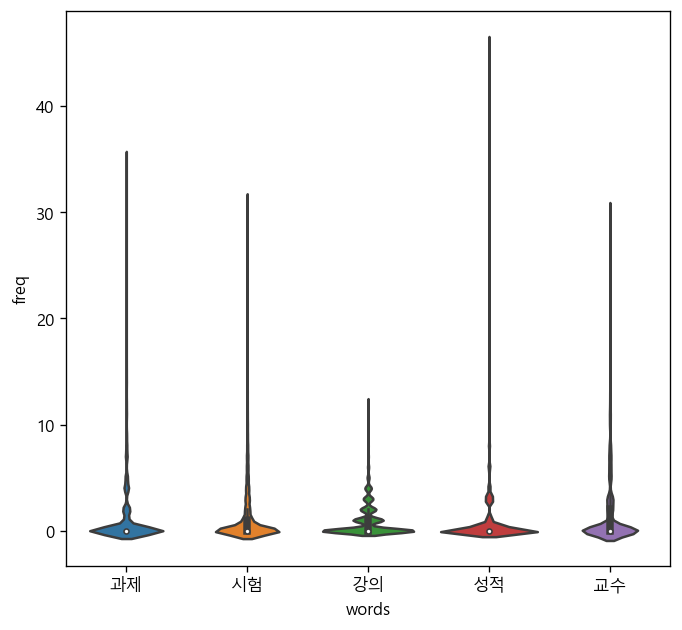

In [39]:
#바이올릿 차트
sns.violinplot(x='words', y='freq', data=inputDF)

<Axes: xlabel='words', ylabel='freq'>

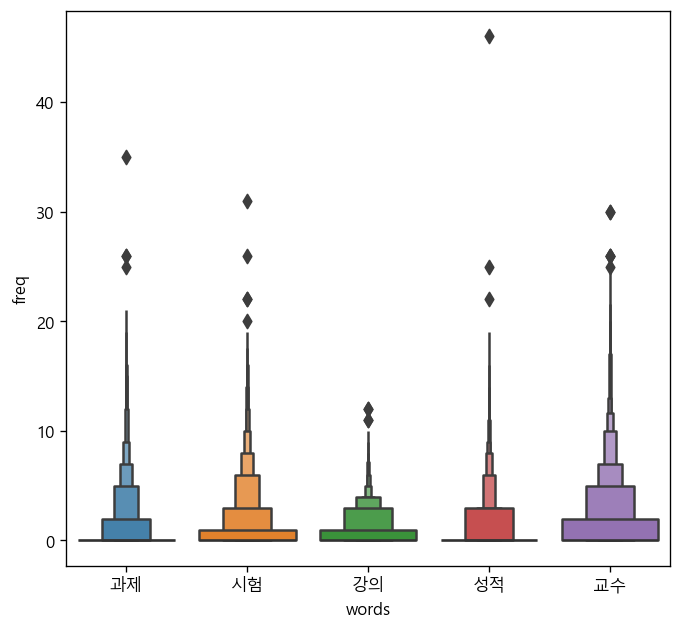

In [40]:
#박슨 플롯
sns.boxenplot(x='words', y='freq', data=inputDF)

# 7. 문서별로 온톨로지 정보 확인하기 (e.g., 영화별로 감정 트랜드 확인하기)

In [88]:
emotions = ['감동', '공포', '권태', '놀람', '분노', '불안', '사랑', '설렘', '섭섭', '성취', '수치', '슬픔', '심란', '연민', '열정', '우울', '재미', '정', '죄책', '질투', '평안', '행복', '혐오']
movies = ["도둑들","26년","광해왕이된남자","설국열차","신세계","은밀하게위대하게"]

movieDic = dict()

#도둑들-Thieves
Thieves_tfidf_matrix = pd.read_csv('./data/tfidf_도둑들_out.csv', index_col=0)
ThievesEmotionMean = []
for i in range(0, len(emotions)):
    ThievesEmotionMean.append(Thieves_tfidf_matrix.loc[emotions[i]].mean())
print(ThievesEmotionMean)
movieDic["도둑들"] = ThievesEmotionMean

#26년-years26
years26_tfidf_matrix = pd.read_csv('./data/tfidf_26년_out.csv', index_col=0)
years26EmotionMean = []
for i in range(0, len(emotions)):
    years26EmotionMean.append(years26_tfidf_matrix.loc[emotions[i]].mean())
print(years26EmotionMean)
movieDic["26년"] = years26EmotionMean

#광해왕이된남자-Gwanghea
Gwanghea_tfidf_matrix = pd.read_csv('./data/tfidf_광해왕이된남자_out.csv', index_col=0)
GwangheaEmotionMean = []
for i in range(0, len(emotions)):
    GwangheaEmotionMean.append(Gwanghea_tfidf_matrix.loc[emotions[i]].mean())
print(GwangheaEmotionMean)
movieDic["광해왕이된남자"] = GwangheaEmotionMean

#설국열차-SnowTrain
SnowTrain_tfidf_matrix = pd.read_csv('./data/tfidf_설국열차_out.csv', index_col=0)
SnowTrainEmotionMean = []
for i in range(0, len(emotions)):
    SnowTrainEmotionMean.append(SnowTrain_tfidf_matrix.loc[emotions[i]].mean())
print(SnowTrainEmotionMean)
movieDic["설국열차"] = SnowTrainEmotionMean

#신세계-NewWorld
NewWorld_tfidf_matrix = pd.read_csv('./data/tfidf_신세계_out.csv', index_col=0)
NewWorldEmotionMean = []
for i in range(0, len(emotions)):
    NewWorldEmotionMean.append(NewWorld_tfidf_matrix.loc[emotions[i]].mean())
print(NewWorldEmotionMean)
movieDic["신세계"] = NewWorldEmotionMean

#은밀하게위대하게-Secret
Secret_tfidf_matrix = pd.read_csv('./data/tfidf_은밀하게위대하게_out.csv', index_col=0)
SecretEmotionMean = []
for i in range(0, len(emotions)):
    SecretEmotionMean.append(Secret_tfidf_matrix.loc[emotions[i]].mean())
print(SecretEmotionMean)
movieDic["은밀하게위대하게"] = SecretEmotionMean

movieDF = pd.DataFrame(movieDic, index=emotions)
print(movieDF)

[0.08898815052536746, 0.09785228949442779, 0.13003818703880282, 0.0646568466024552, 0.14723235940063126, 0.19329295635525007, 0.10507472149805437, 0.25855419863522877, 0.19677527804324194, 0.14141601870553044, 0.03498339030464012, 0.12585831461587374, 0.06565464705104353, 0.032374006927604, 0.2536760054261559, 0.05164360763802466, 0.3574917525274473, 0.09983985108944045, 0.02828445283556656, 0.020052917071456892, 0.1982722977056117, 0.1758364583783988, 0.5365237375362625]
[0.12639341709845728, 0.1289422955582759, 0.1310412605188345, 0.0555045269638214, 0.24679186000533546, 0.2155644791476028, 0.0967313416176401, 0.0678297559654046, 0.14766641659479468, 0.27520538640926084, 0.17775159628298243, 0.154898266212246, 0.11382337109434358, 0.05072240342016643, 0.2722801264529046, 0.04851307938120664, 0.21267570067200303, 0.21897284189018953, 0.03627952401031298, 0.02759041680364004, 0.1314747848411578, 0.15285446991381837, 0.5731144036209319]
[0.3183774603673546, 0.09660054723009456, 0.096792

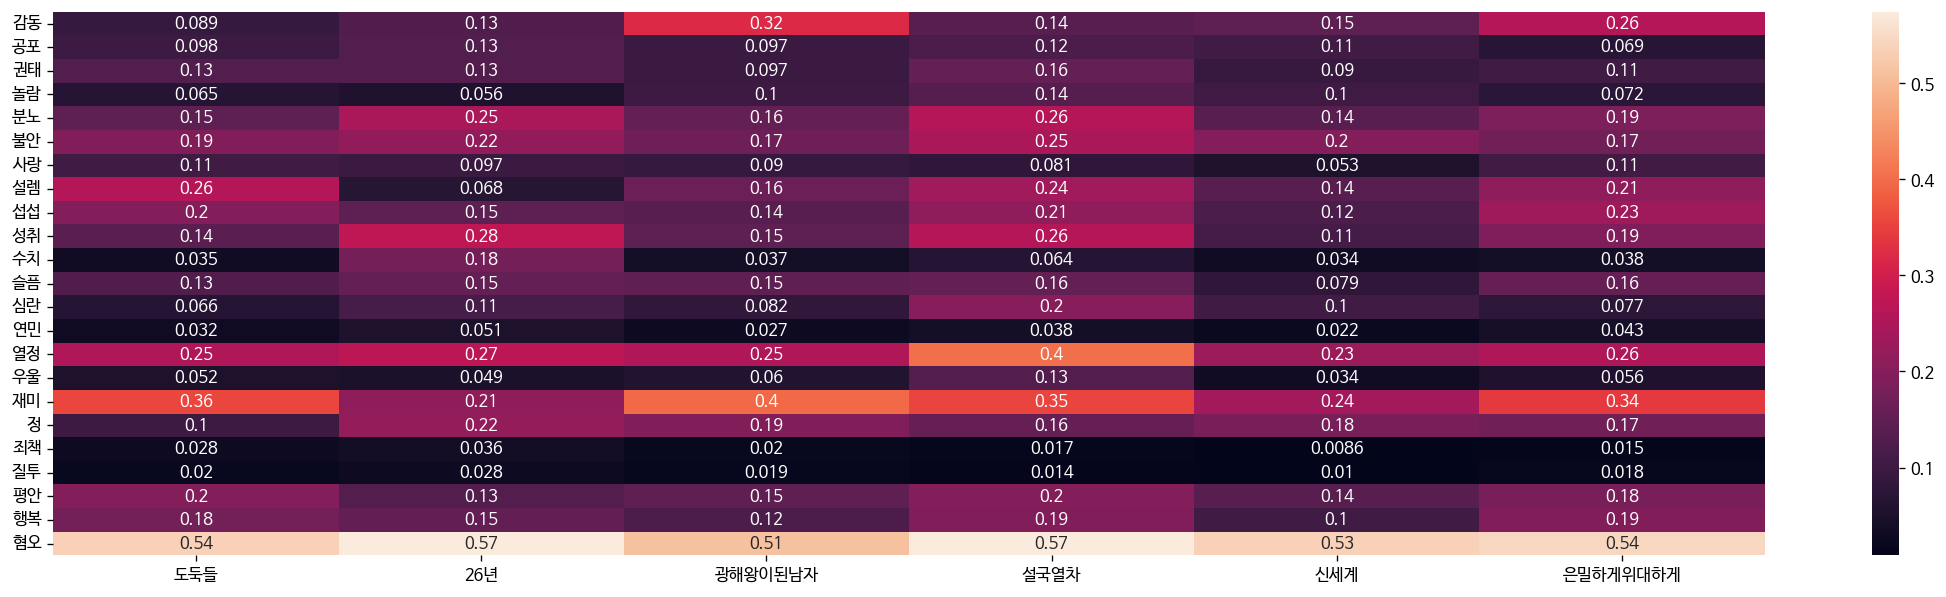

In [89]:
#히트맵로 표현하기
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams.update({'font.family':'NanumBarunGothic'})
# plt.rcParams.update({'font.family':'Malgun Gothic'})
plt.rcParams.update({'figure.dpi':'120'})
plt.rcParams.update({'figure.figsize':[6.5,6]})

plt.figure(figsize=(23, 6))
sns.heatmap(movieDF, annot=True)
plt.show()

# 8.네트워크 시각화 생성하기

In [42]:
!pip install pyvis

                                              0.0/756.0 kB ? eta -:--:--
     ------------                           256.0/756.0 kB 7.9 MB/s eta 0:00:01
     --------------------------             532.5/756.0 kB 6.7 MB/s eta 0:00:01
     -------------------------------------  747.5/756.0 kB 6.8 MB/s eta 0:00:01
     -------------------------------------- 756.0/756.0 kB 6.0 MB/s eta 0:00:00
                                              0.0/40.5 kB ? eta -:--:--
     ---------------------------------------- 40.5/40.5 kB ? eta 0:00:00
                                              0.0/2.1 MB ? eta -:--:--
     ---                                      0.2/2.1 MB 4.1 MB/s eta 0:00:01
     ---------                                0.5/2.1 MB 5.2 MB/s eta 0:00:01
     ---------------                          0.8/2.1 MB 5.4 MB/s eta 0:00:01
     --------------------                     1.1/2.1 MB 5.6 MB/s eta 0:00:01
     -------------------------                1.3/2.1 MB 6.0 MB/s eta 0:00:01
 

## 네트워크 데이터 만들기
- https://wikidocs.net/24603

## 코사인 유사도(Cosine Similarity)
- Dan Jurafsky: https://web.stanford.edu/~jurafsky/
- CS124(From Languages to Information): https://www.youtube.com/channel/UC_48v322owNVtORXuMeRmpA
- (2:30): https://www.youtube.com/watch?v=-_i9Cg81rXA&list=PLaZQkZp6WhWxIvz74aEvvVc99o7WuOoQ6&index=4

In [90]:
import numpy as np
from numpy import dot
from numpy.linalg import norm

def cos_sim(A, B):
    return dot(A, B)/(norm(A)*norm(B))

movies = ["도둑들","26년","광해왕이된남자","설국열차","신세계","은밀하게위대하게"]

sourceList = []
targetList = []
scoreList = []
for i in range(0,len(movies)):
    for j in range(0,len(movies)):
        source = np.array(list(movieDF.loc[:,movies[i]]))
        target = np.array(list(movieDF.loc[:,movies[j]]))
        score = cos_sim(source, target)
        if 0.95 <= score:
            if movies[i] != movies[j]:
                sourceList.append(movies[i])
                targetList.append(movies[j])
                scoreList.append(score)
            
movieNetwork = pd.DataFrame({'source':sourceList, 'target':targetList, 'score':scoreList})
movieNetwork.to_csv("./data/movieNetwork.csv")  
print(movieNetwork)

      source    target     score
0        도둑들      설국열차  0.969219
1        도둑들       신세계  0.963299
2        도둑들  은밀하게위대하게  0.974567
3        26년      설국열차  0.954324
4        26년       신세계  0.954576
5    광해왕이된남자       신세계  0.965345
6    광해왕이된남자  은밀하게위대하게  0.983854
7       설국열차       도둑들  0.969219
8       설국열차       26년  0.954324
9       설국열차       신세계  0.963917
10      설국열차  은밀하게위대하게  0.966536
11       신세계       도둑들  0.963299
12       신세계       26년  0.954576
13       신세계   광해왕이된남자  0.965345
14       신세계      설국열차  0.963917
15       신세계  은밀하게위대하게  0.968000
16  은밀하게위대하게       도둑들  0.974567
17  은밀하게위대하게   광해왕이된남자  0.983854
18  은밀하게위대하게      설국열차  0.966536
19  은밀하게위대하게       신세계  0.968000


In [91]:
#선택과 필터 적용하기
from pyvis.network import Network

net = Network(notebook=True, cdn_resources="remote", bgcolor="#151417", font_color="#F0EDF6", width="100%", select_menu=True, filter_menu=True)

#각 열의 데이터를 숫자 나열로 변환 ex) 2839 2309 0 2088 1319 1741 3460 1029 3332
nodes = list(set([*movieNetwork.source, *movieNetwork.target]))
#텍스트파일에 존재하는 관계 데이터를 중첩 리스트 형태로 변환 ex) [[2839, 3064], [2309, 2590]]
edges = movieNetwork.values.tolist()

net.add_nodes(nodes)
net.add_edges(edges)
net.show("movieNetwork.html")

movieNetwork.html
